In [2]:
import numpy as np # linear algebra

import pandas as pd 
import polars as pl

print(pd.__version__)
print(pl.__version__)

2.2.2
1.6.0


In [14]:
def random_string_array(size , str_len):
    # Generate random strings of length 'str_len'
    chars = np.array(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOQRSTUVWXYZ0123456789'))
    return [''.join(np.random.choice(chars , str_len)) for _ in range(size) ]

def create_table(n):
    np.random.seed(42)
    df = pd.DataFrame(
        {
            'col01' : np.random.randint(0,127, size= n).astype(np.int8),
            'col02' : np.random.randint(0,32767, size= n).astype(np.int16),
            'col03' : np.random.randint(0,40000, size= n).astype(np.int32),
            'col04' : np.random.randint(0,4000, size= n).astype(np.int64),
            'col05' : np.random.uniform(0, 1, size = n).astype(np.float16),
            'col06' : np.random.uniform(0, 1, size = n).astype(np.float32),
            'col07' : np.random.uniform(0, 1, size = n).astype(np.float64),
            'col08' : random_string_array(n , 6),
            'col09' : pd.Categorical(random_string_array(n , 6)),
            'col10' : np.random.randint(0,1, size= n).astype(bool),
            'col11' : pd.date_range('1900-01-01', periods=n, freq='T')
        })
    return df

df = create_table(4000000)
display(df.info(memory_usage="deep"))
df.to_csv("example.csv", index=False)

2.2.2
1.6.0


C:\Users\jayakal\AppData\Local\Temp\ipykernel_20096\792326775.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'col11' : pd.date_range('1900-01-01', periods=n, freq='T')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   col01   int8          
 1   col02   int16         
 2   col03   int32         
 3   col04   int64         
 4   col05   float16       
 5   col06   float32       
 6   col07   float64       
 7   col08   object        
 8   col09   category      
 9   col10   bool          
 10  col11   datetime64[ns]
dtypes: bool(1), category(1), datetime64[ns](1), float16(1), float32(1), float64(1), int16(1), int32(1), int64(1), int8(1), object(1)
memory usage: 708.8 MB


None

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

def plot_comparison(pd_time, pl_time, title):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    times = [pd_time.average, pl_time.average]
    times = np.round(times, 3)

    sns.barplot(x = ['Pandas',
                   'Polars'], 
                y = times, color = 'white', edgecolor='black')


    ax.patches[0].set(fill=False, hatch='.')

    ax.set_title(f"Comparison of {title}")
    ax.set_ylabel("Time to Execute [s]")
    ax.set_xlabel("Python Package")
    ax.bar_label(ax.containers[0])
    plt.savefig(f'./pandas_vs_polars_{title}.png', transparent=False,  facecolor='white', bbox_inches="tight")
    plt.show()
    

In [18]:
df_pd = pd.read_csv("./example.csv")
display(df_pd.info(memory_usage="deep"))

df_pl = pl.read_csv("./example.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   col01   int64  
 1   col02   int64  
 2   col03   int64  
 3   col04   int64  
 4   col05   float64
 5   col06   float64
 6   col07   float64
 7   col08   object 
 8   col09   object 
 9   col10   bool   
 10  col11   object 
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 896.5 MB


None

In [10]:
pd_time = %timeit -n32 -r4 -o df_pd = pd.read_csv("example.csv")

10.2 s ± 8.7 ms per loop (mean ± std. dev. of 4 runs, 32 loops each)


In [11]:
pl_time = %timeit -n32 -r4 -o df_pl = pl.read_csv("example.csv")

435 ms ± 4.26 ms per loop (mean ± std. dev. of 4 runs, 32 loops each)


In [15]:
print(pd_time.average)

10.183757935937592


TypeError: unsupported operand type(s) for *: 'TimeitResult' and 'float'

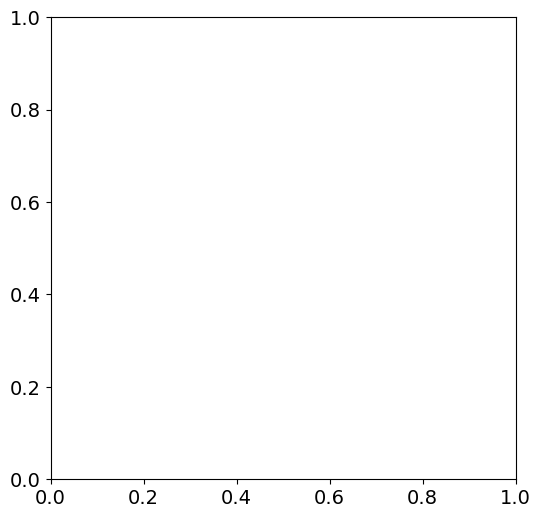

In [16]:
plot_comparison(pd_time, pl_time, 'Reading')